# Hypothesis
- Hypothesis for Upsell Potential:
    - Hypothesis 1: Customers with higher agent_utilization are more likely to respond positively to upsell offers.
    - Hypothesis 2: Customers with a higher nps_score are more likely to purchase additional products.

- Hypothesis for Cross-Sell Potential:
    - Hypothesis 3: Customers in the segment_commercial are more likely to cross-sell than those in other segments.
    - Hypothesis 4: Customers with a higher product_counts are more likely to engage in cross-sell opportunities.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

In [3]:
customer = pd.read_csv('customer.csv')
customer_feedback = pd.read_csv('customer_feedback.csv')
expansion_outcome = pd.read_csv('expansion_outcome.csv')
product = pd.read_csv('product.csv')
utilization = pd.read_csv('utilization.csv')

In [15]:
product['id'].describe()

count            13417
unique            1053
top       JMAN_2429072
freq                13
Name: id, dtype: object

In [5]:
for i in list(product['id'].unique()):
    print(i, " => ", len(product[product['id'] == i]))

JMAN_2429072  =>  13
JMAN_9043466  =>  13
JMAN_2452556  =>  13
JMAN_2455113  =>  13
JMAN_18127937  =>  13
JMAN_2373631  =>  13
JMAN_2447279  =>  13
JMAN_9004478  =>  13
JMAN_2477864  =>  13
JMAN_2445629  =>  13
JMAN_9034877  =>  13
JMAN_14450264  =>  13
JMAN_18839586  =>  13
JMAN_12250851  =>  13
JMAN_9601250  =>  13
JMAN_9016831  =>  13
JMAN_18411228  =>  13
JMAN_10361494  =>  12
JMAN_18409952  =>  13
JMAN_2468132  =>  13
JMAN_9005782  =>  13
JMAN_9023427  =>  13
JMAN_9002816  =>  13
JMAN_18391384  =>  13
JMAN_9773302  =>  13
JMAN_13717602  =>  13
JMAN_2468379  =>  13
JMAN_2475116  =>  13
JMAN_11710046  =>  13
JMAN_11265556  =>  13
JMAN_9034116  =>  13
JMAN_9744797  =>  13
JMAN_2472023  =>  13
JMAN_2459144  =>  13
JMAN_9810546  =>  13
JMAN_2461321  =>  13
JMAN_10303029  =>  13
JMAN_2457086  =>  13
JMAN_2478859  =>  13
JMAN_10078002  =>  13
JMAN_9839217  =>  13
JMAN_9387901  =>  13
JMAN_2460501  =>  13
JMAN_11272416  =>  13
JMAN_9022859  =>  13
JMAN_2439655  =>  13
JMAN_10190396  =>  1

In [6]:
for i in customer_feedback.columns[1:2]:
    print(i)
    for j in customer_feedback[i].unique():
        print(j, " => ", len(customer_feedback[customer_feedback[i] == j]))

score_date
10-02-2023  =>  1037
13-01-2023  =>  1045
24-02-2023  =>  1031
03-03-2023  =>  1028
20-01-2023  =>  1044
24-03-2023  =>  1017
17-03-2023  =>  1021
27-01-2023  =>  1041
06-01-2023  =>  1044
17-02-2023  =>  1034
10-03-2023  =>  1025
31-03-2023  =>  1011
03-02-2023  =>  1039


In [7]:
for i in customer_feedback.columns[2:3]:
    print(i)
    for j in customer_feedback[i].unique():
        print(j, " => ", len(customer_feedback[customer_feedback[i] == j]))

csat_score
100  =>  2148
0  =>  10980
50  =>  99
80  =>  27
75  =>  37
67  =>  26
86  =>  29
88  =>  21
78  =>  6
60  =>  9
83  =>  15
82  =>  4
84  =>  3
81  =>  2
85  =>  5
71  =>  1
89  =>  5


In [8]:
for i in customer_feedback.columns[3:4]:
    print(i)
    for j in customer_feedback[i].unique():
        print(j, " => ", len(customer_feedback[customer_feedback[i] == j]))

csat_response_rate
33  =>  345
17  =>  115
0  =>  10812
25  =>  238
38  =>  28
13  =>  86
45  =>  14
100  =>  323
14  =>  79
43  =>  27
29  =>  58
50  =>  396
20  =>  189
5  =>  8
44  =>  9
80  =>  6
56  =>  1
22  =>  24
37  =>  8
21  =>  11
23  =>  13
10  =>  37
16  =>  11
27  =>  24
18  =>  41
67  =>  62
7  =>  43
40  =>  82
11  =>  38
60  =>  10
24  =>  11
6  =>  18
12  =>  12
88  =>  6
75  =>  1
9  =>  16
30  =>  8
35  =>  13
15  =>  32
31  =>  8
36  =>  35
8  =>  27
42  =>  16
86  =>  7
4  =>  14
47  =>  8
64  =>  1
19  =>  14
26  =>  2
68  =>  1
70  =>  2
32  =>  6
3  =>  2
28  =>  4
66  =>  2
58  =>  2
71  =>  1
34  =>  2
57  =>  3
73  =>  3
46  =>  1
69  =>  1


In [10]:
customer_feedback.drop(columns=["nps_score"	,"nps_score_all_time",	"avg_nps_rating",	"avg_nps_rating_all_time"], inplace=True)

In [11]:
product.drop(columns="total_pool_max_agents", inplace=True)

In [7]:
data = customer.merge(customer_feedback, on=["id","score_date"], how="left").merge(expansion_outcome, on=["id","score_date"], how="left").merge(product, on=["id","score_date"], how="left").merge(utilization, on=["id","score_date"], how="left")

In [90]:
data.head()

,id,score_date,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,...,max_seats,agent_utilization,is_provisioned_any_channel_M_before,max_seats_M_before,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease
0,JMAN_2429072,10-02-2023,1,0,0,0,0,1,0,0,...,2.0,0.500000,2.0,2.0,0,0,1.0,1.0,0,0
1,JMAN_9043466,13-01-2023,0,1,1,0,0,1,0,0,...,9.0,0.111111,9.0,9.0,0,1,1.0,1.0,0,0
2,JMAN_2452556,24-02-2023,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.0,1.0,0,0
3,JMAN_2455113,03-03-2023,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,1,1.0,1.0,0,0
4,JMAN_18127937,10-02-2023,0,1,0,0,0,1,0,0,...,5.0,0.000000,NaN,5.0,0,0,0.0,0.0,0,0


In [91]:
data.columns

Index(['id', 'score_date', 'segment_smb', 'segment_non_smb',
       'segment_commercial', 'segment_enterprise', 'segment_midmarket',
       'region_emea', 'region_apac', 'region_latam', 'region_amer',
       'customer_age_quarters', 'sales_assisted', 'legacy_flag',
       'product_counts', 'billing_dunning_not_ok', 'crm_industry_current',
       'crm_employee_range', 'crm_success_owner_change', 'csat_score',
       'csat_response_rate', 'outreach_call_90dayflag', 'num_low_sev_outages',
       'num_high_sev_outages', 'has_high_sev_outage',
       'months_since_high_sev_outage', 'num_tickets_deflected',
       'max_tickets_per_agent', 'current_arr', 'future_arr', 'arr_change',
       'fx_impact', 'seat_change_arr', 'product_change_arr',
       'discount_arr_usd', 'team_plus', 'pro_plus', 'ent_plus',
       'discount_arr_usd_percentage', 'product_counts_percentage', 'max_seats',
       'agent_utilization', 'is_provisioned_any_channel_M_before',
       'max_seats_M_before', 'agent_utilizat

In [92]:
# Group by ID and analyze product tier changes
def analyze_product_tier_changes(data):
    # Sort data by ID and date
    data_sorted = data.sort_values(['id', 'score_date'])
    
    # Create product tier change analysis
    tier_changes = []
    
    for customer_id in data_sorted['id'].unique():
        customer_data = data_sorted[data_sorted['id'] == customer_id]
        
        if len(customer_data) > 1:  # Only analyze if multiple records exist
            first_record = customer_data.iloc[0]
            last_record = customer_data.iloc[-1]
            
            changes = {
                'id': customer_id,
                'start_date': first_record['score_date'],
                'end_date': last_record['score_date'],
                'team_plus_change': last_record['team_plus'] - first_record['team_plus'],
                'pro_plus_change': last_record['pro_plus'] - first_record['pro_plus'],
                'ent_plus_change': last_record['ent_plus'] - first_record['ent_plus'],
                'total_products_start': first_record['team_plus'] + first_record['pro_plus'] + first_record['ent_plus'],
                'total_products_end': last_record['team_plus'] + last_record['pro_plus'] + last_record['ent_plus']
            }
            
            # Add revenue impact
            changes['revenue_impact'] = last_record['current_arr'] - first_record['current_arr']
            
            tier_changes.append(changes)
    
    # Convert to DataFrame
    changes_df = pd.DataFrame(tier_changes)
    
    # Filter to show only records with changes
    changes_df['has_changes'] = (changes_df['team_plus_change'] != 0) | \
                               (changes_df['pro_plus_change'] != 0) | \
                               (changes_df['ent_plus_change'] != 0)
    
    return changes_df[changes_df['has_changes']]

# Execute the analysis
tier_changes = analyze_product_tier_changes(data)

# Display results
print("\nCustomers with Product Tier Changes:")
print(tier_changes[['id', 'start_date', 'end_date', 
                    'team_plus_change', 'pro_plus_change', 'ent_plus_change', 
                    'revenue_impact']].to_string())

# Summary statistics
print("\nSummary Statistics:")
print(f"Total customers with changes: {len(tier_changes)}")
print("\nAverage revenue impact by change type:")
for col in ['team_plus_change', 'pro_plus_change', 'ent_plus_change']:
    avg_impact = tier_changes[tier_changes[col] != 0]['revenue_impact'].mean()
    print(f"{col}: ${avg_impact:,.2f}")


Customers with Product Tier Changes:
                id  start_date    end_date  team_plus_change  pro_plus_change  ent_plus_change  revenue_impact
27   JMAN_10410810  03-02-2023  31-03-2023                 0                0                1        22428.00
83   JMAN_11352880  03-02-2023  31-03-2023                 0                0                1         7272.00
299   JMAN_2374491  03-02-2023  31-03-2023                 0                1                0         2840.04
360   JMAN_2444949  03-02-2023  31-03-2023                -1               -1                0         -828.00
436   JMAN_2455695  03-02-2023  31-03-2023                 0                0                1          180.00
439   JMAN_2456399  03-02-2023  31-03-2023                 0                0                1         4233.84
496   JMAN_2464269  03-02-2023  31-03-2023                -1               -1                0        -4509.00
565   JMAN_2473215  03-02-2023  31-03-2023                -1              

0 0 0
1 0 0
1 1 0
1 1 1

In [101]:
data[(data['team_plus'] == 0) & (data['pro_plus'] == 0) & (data['ent_plus'] == 0)]

,id,score_date,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,...,max_seats,agent_utilization,is_provisioned_any_channel_M_before,max_seats_M_before,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease
5,JMAN_2373631,03-03-2023,0,1,0,0,0,0,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.0,1.0,0,0
8,JMAN_2477864,24-03-2023,1,0,0,0,0,0,1,0,...,6.0,0.166667,6.0,6.0,0,1,1.0,1.0,0,0
20,JMAN_9005782,10-02-2023,0,1,0,0,0,1,0,0,...,3.0,0.000000,3.0,3.0,0,0,1.0,1.0,0,0
21,JMAN_9023427,03-03-2023,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.0,1.0,0,0
22,JMAN_9002816,27-01-2023,0,1,0,0,0,0,0,1,...,1.0,0.000000,1.0,1.0,0,0,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13385,JMAN_2439200,13-01-2023,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,1,1.0,1.0,0,0
13386,JMAN_2483316,24-03-2023,1,0,0,0,0,0,1,0,...,7.0,0.571429,7.0,7.0,1,0,1.0,1.0,0,0
13391,JMAN_2481357,31-03-2023,0,1,0,0,0,0,0,0,...,2.0,0.000000,1.0,2.0,0,0,0.5,0.5,0,0
13396,JMAN_2468303,24-03-2023,1,0,0,0,0,0,0,0,...,8.0,0.125000,8.0,8.0,0,1,1.0,1.0,0,0


In [111]:
data[(data['team_plus'] == 0) & (data['pro_plus'] == 0) & (data['ent_plus'] == 0)]

,id,score_date,segment_smb,segment_non_smb,segment_commercial,segment_enterprise,segment_midmarket,region_emea,region_apac,region_latam,...,max_seats,agent_utilization,is_provisioned_any_channel_M_before,max_seats_M_before,agent_utilization_increase,agent_utilization_decrease,seat_utilization,seat_utilization_M_before,seat_utilization_increase,seat_utilization_decrease
5,JMAN_2373631,03-03-2023,0,1,0,0,0,0,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.0,1.0,0,0
8,JMAN_2477864,24-03-2023,1,0,0,0,0,0,1,0,...,6.0,0.166667,6.0,6.0,0,1,1.0,1.0,0,0
20,JMAN_9005782,10-02-2023,0,1,0,0,0,1,0,0,...,3.0,0.000000,3.0,3.0,0,0,1.0,1.0,0,0
21,JMAN_9023427,03-03-2023,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,0,1.0,1.0,0,0
22,JMAN_9002816,27-01-2023,0,1,0,0,0,0,0,1,...,1.0,0.000000,1.0,1.0,0,0,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13385,JMAN_2439200,13-01-2023,0,1,0,0,0,1,0,0,...,1.0,0.000000,1.0,1.0,0,1,1.0,1.0,0,0
13386,JMAN_2483316,24-03-2023,1,0,0,0,0,0,1,0,...,7.0,0.571429,7.0,7.0,1,0,1.0,1.0,0,0
13391,JMAN_2481357,31-03-2023,0,1,0,0,0,0,0,0,...,2.0,0.000000,1.0,2.0,0,0,0.5,0.5,0,0
13396,JMAN_2468303,24-03-2023,1,0,0,0,0,0,0,0,...,8.0,0.125000,8.0,8.0,0,1,1.0,1.0,0,0


In [104]:
sam =data.head(20)

In [105]:
sam.to_csv('dataset.csv', index=False)

In [4]:
import pandas as pd

# Load the dataset (assuming it's in CSV format)
df = data

# Display basic info
def explore_data(df):
    print("\nData Overview:\n")
    print(df.info())
    print("\nMissing Values:\n")
    print(df.isnull().sum())
    print("\nBasic Statistics:\n")
    print(df.describe(include='all'))
    
    # Iterate through each column
    for col in df.columns:
        print(f"\nColumn: {col}")
        print("Unique Values:", df[col].nunique())
        print(df[col].value_counts())
        
        if df[col].dtype == 'object':
            print("Data Type: Categorical")
        else:
            print("Data Type: Numerical")
            print("Mean:", df[col].mean(skipna=True))
            print("Median:", df[col].median(skipna=True))
            print("Standard Deviation:", df[col].std(skipna=True))
            print("Min:", df[col].min(skipna=True))
            print("Max:", df[col].max(skipna=True))

# Run data exploration
explore_data(df)


NameError: name 'data' is not defined

In [22]:
import pandas as pd
import numpy as np

# Load the dataset
df = data

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handling missing values
# Fill missing numerical values with the median, categorical with the mode
df['nps_score'] = df['nps_score'].fillna(df['nps_score'].median())
df['avg_nps_rating'] = df['avg_nps_rating'].fillna(df['avg_nps_rating'].median())
df['months_since_high_sev_outage'] = df['months_since_high_sev_outage'].fillna(df['months_since_high_sev_outage'].median())
df['future_arr'] = df['future_arr'].fillna(df['future_arr'].median())
df['is_provisioned_any_channel_M_before'] = df['is_provisioned_any_channel_M_before'].fillna(df['is_provisioned_any_channel_M_before'].median())
df['max_seats'] = df['max_seats'].fillna(df['max_seats'].median())
df['max_seats_M_before'] = df['max_seats_M_before'].fillna(df['max_seats_M_before'].median())

# Drop columns with too many missing values if necessary
df.drop(columns=['crm_industry_current'], inplace=True)

# Convert categorical variables to category type
df['crm_employee_range'] = df['crm_employee_range'].astype('category')

# Check the cleaned data
print(df.info())
print(df.isnull().sum())

              id  score_date  segment_smb  segment_non_smb  \
0   JMAN_2429072  10-02-2023            1                0   
1   JMAN_9043466  13-01-2023            0                1   
2   JMAN_2452556  24-02-2023            0                1   
3   JMAN_2455113  03-03-2023            0                1   
4  JMAN_18127937  10-02-2023            0                1   

   segment_commercial  segment_enterprise  segment_midmarket  region_emea  \
0                   0                   0                  0            1   
1                   1                   0                  0            1   
2                   0                   0                  0            1   
3                   0                   0                  0            1   
4                   0                   0                  0            1   

   region_apac  region_latam  ...  max_seats  agent_utilization  \
0            0             0  ...        2.0           0.500000   
1            0             0  

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = data
# Handle missing values
# For nps_score_all_time and avg_nps_rating_all_time, we could:
df['nps_score_all_time'] = df['nps_score_all_time'].fillna(df['nps_score'])
df['avg_nps_rating_all_time'] = df['avg_nps_rating_all_time'].fillna(df['avg_nps_rating'])

# Convert score_date to datetime format
df['score_date'] = pd.to_datetime(df['score_date'], format='%d-%m-%Y')

# Create derived features
df['months_since_scoring'] = (pd.Timestamp.now() - df['score_date']).dt.days / 30
df['utilization_ratio'] = df['agent_utilization'] / df['seat_utilization'].replace(0, np.nan)
df['arr_per_seat'] = df['current_arr'] / df['max_seats'].replace(0, np.nan)

In [9]:
# Analyze customer segments
segment_counts = df[['segment_smb', 'segment_non_smb', 'segment_commercial', 
                     'segment_enterprise', 'segment_midmarket']].sum()

# Regional distribution
region_counts = df[['region_emea', 'region_apac', 'region_latam', 'region_amer']].sum()

# Cross-tabulation of segments and regions
segment_region = pd.crosstab(df['segment_smb'], df['region_emea'])

In [11]:
# Product usage statistics
product_stats = df[['product_counts', 'team_plus', 'pro_plus', 'ent_plus']].describe()

# ARR (Annual Recurring Revenue) analysis
arr_stats = df[['current_arr', 'future_arr', 'arr_change', 'seat_change_arr', 
                'product_change_arr']].describe()

# Discount analysis
discount_stats = df[['discount_arr_usd', 'discount_arr_usd_percentage']].describe()

In [12]:
# Agent utilization analysis
utilization_stats = df[['agent_utilization', 'seat_utilization', 
                        'agent_utilization_increase', 'agent_utilization_decrease']].describe()

# Ticket and outage analysis
ticket_stats = df[['num_tickets_deflected', 'max_tickets_per_agent', 
                  'num_low_sev_outages', 'num_high_sev_outages']].describe()

In [13]:
# NPS and CSAT analysis
satisfaction_stats = df[['csat_score', 'csat_response_rate', 'nps_score', 'avg_nps_rating']].describe()

# Correlation between satisfaction metrics and revenue
satisfaction_corr = df[['csat_score', 'nps_score', 'current_arr', 'arr_change']].corr()

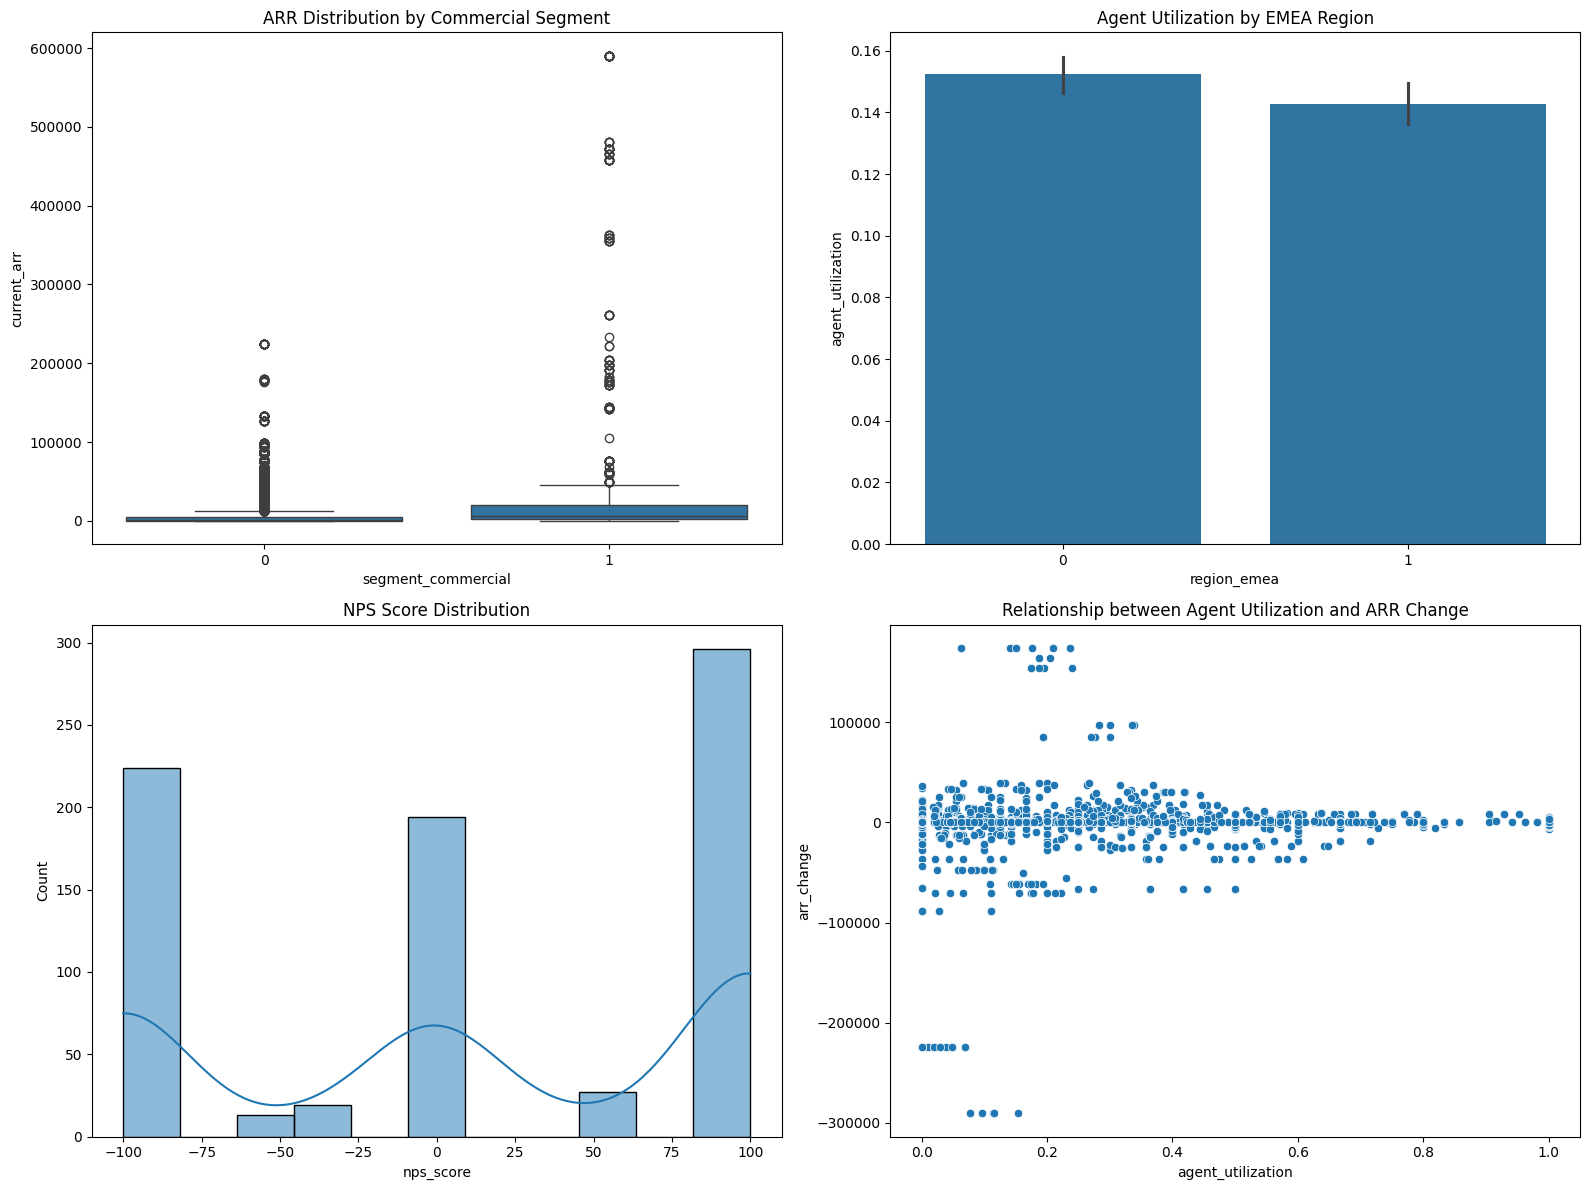

In [15]:
# Set up visualization style
# plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. ARR distribution by segment
sns.boxplot(x='segment_commercial', y='current_arr', data=df, ax=axes[0, 0])
axes[0, 0].set_title('ARR Distribution by Commercial Segment')

# 2. Agent utilization by region
sns.barplot(x='region_emea', y='agent_utilization', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Agent Utilization by EMEA Region')

# 3. NPS score distribution
sns.histplot(df['nps_score'].dropna(), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('NPS Score Distribution')

# 4. Correlation between agent utilization and ARR change
sns.scatterplot(x='agent_utilization', y='arr_change', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Relationship between Agent Utilization and ARR Change')

plt.tight_layout()

/tmp/ipykernel_8047/1460513439.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='premium_product_count', y='max_tickets_per_agent',
/tmp/ipykernel_8047/1460513439.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='premium_product_count', data=df, palette='Blues', ax=ax2_supp)
/tmp/ipykernel_8047/1460513439.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_growth', y='product_counts',


ValueError: The palette dictionary is missing keys: {'1'}

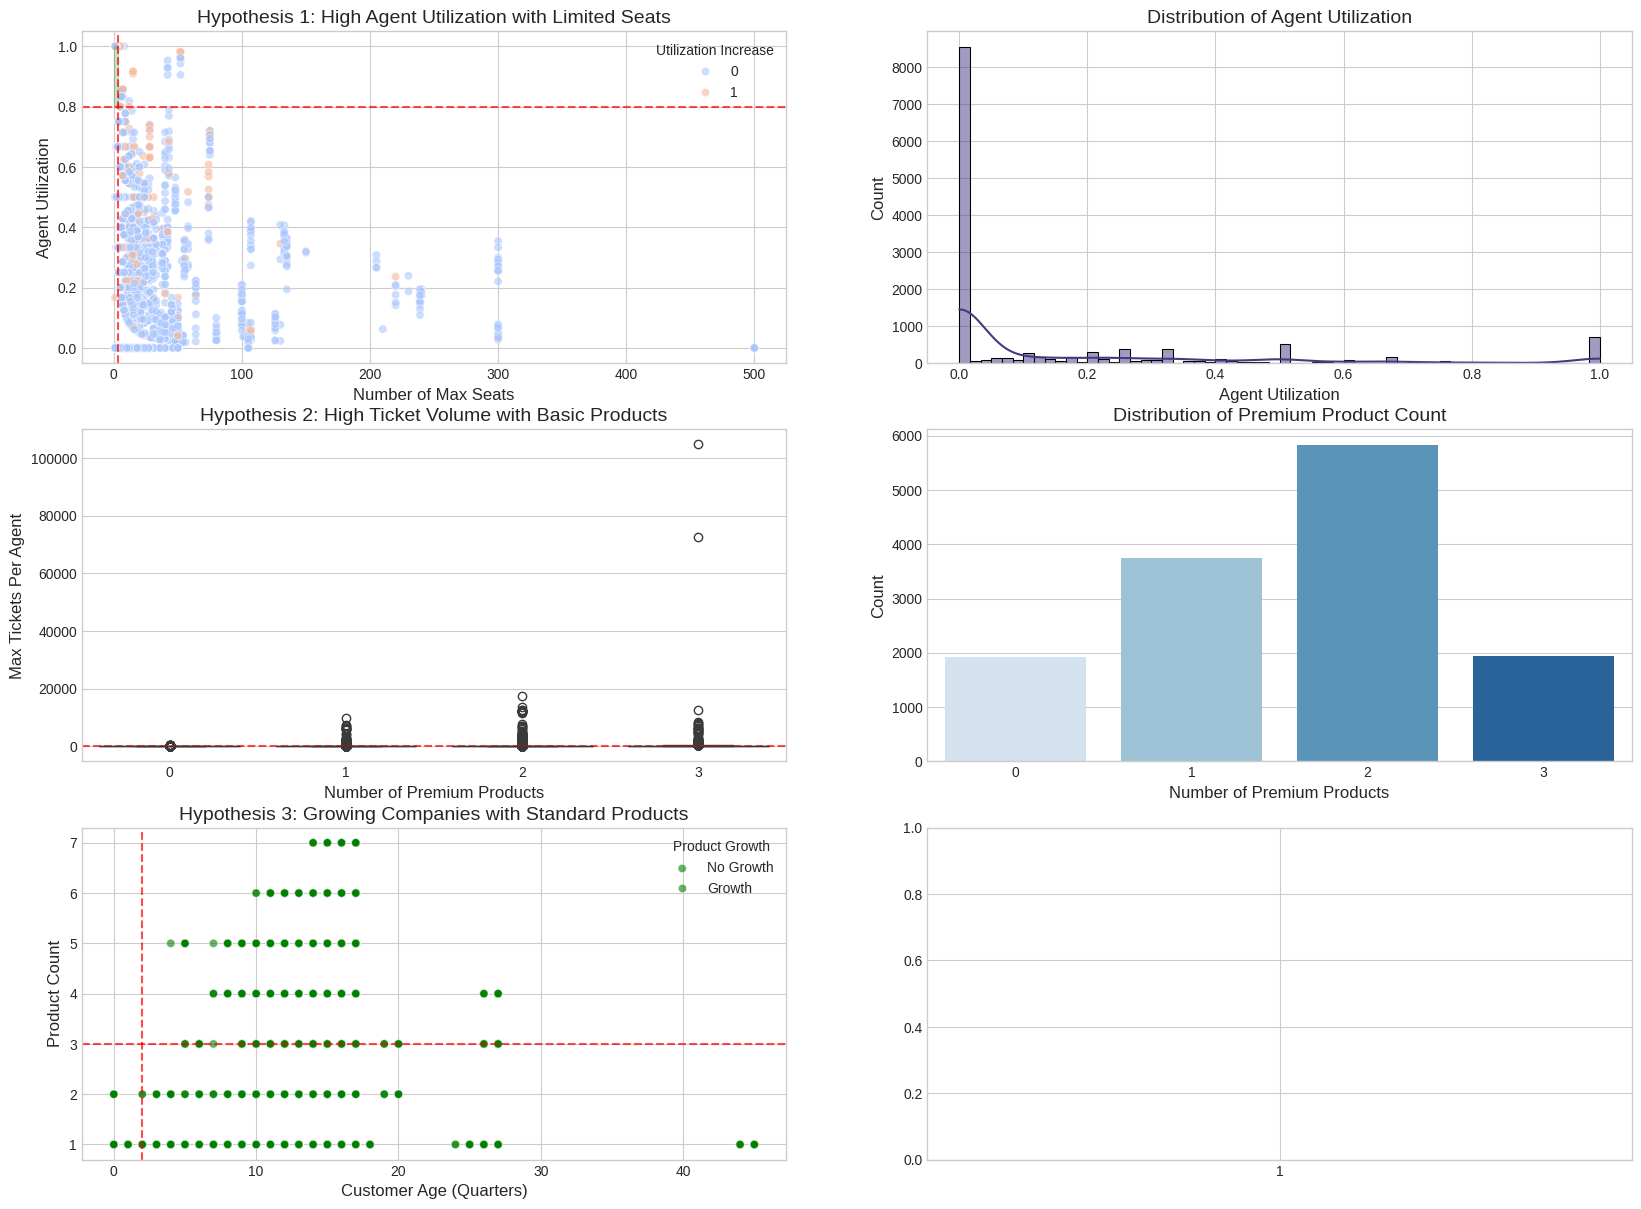

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Assuming df is our dataset
# For demonstration purposes, let's create visualization code for each hypothesis

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a figure with subplots for each hypothesis
fig = plt.figure(figsize=(20, 25))
gs = GridSpec(5, 2, figure=fig)

# Color palette
colors = sns.color_palette("viridis", 5)

# ===================== HYPOTHESIS 1 =====================
# High Agent Utilization with Limited Seats
ax1 = fig.add_subplot(gs[0, 0])
ax1_supp = fig.add_subplot(gs[0, 1])

# Main plot: Agent Utilization vs Max Seats
scatter = sns.scatterplot(x='max_seats', y='agent_utilization', 
                         data=df, 
                         hue='agent_utilization_increase',
                         palette='coolwarm',
                         alpha=0.6,
                         ax=ax1)

# Add a horizontal line at agent_utilization = 0.8
ax1.axhline(y=0.8, color='red', linestyle='--', alpha=0.7)
# Add a vertical line at median max_seats
ax1.axvline(x=df['max_seats'].median(), color='red', linestyle='--', alpha=0.7)

# Highlight the potential upsell region
ax1.fill_between(x=[0, df['max_seats'].median()], 
                y1=0.8, y2=1.0, 
                color='green', alpha=0.2)

ax1.set_title('Hypothesis 1: High Agent Utilization with Limited Seats', fontsize=14)
ax1.set_xlabel('Number of Max Seats', fontsize=12)
ax1.set_ylabel('Agent Utilization', fontsize=12)
ax1.legend(title='Utilization Increase', loc='upper right')

# Supporting plot: Distribution of agent utilization
sns.histplot(df['agent_utilization'], kde=True, color=colors[0], ax=ax1_supp)
ax1_supp.set_title('Distribution of Agent Utilization', fontsize=14)
ax1_supp.set_xlabel('Agent Utilization', fontsize=12)
ax1_supp.set_ylabel('Count', fontsize=12)

# ===================== HYPOTHESIS 2 =====================
# High Ticket Volume with Basic Products
ax2 = fig.add_subplot(gs[1, 0])
ax2_supp = fig.add_subplot(gs[1, 1])

# Create a new column for premium product count
df['premium_product_count'] = df['team_plus'] + df['pro_plus'] + df['ent_plus']

# Main plot: Ticket Volume vs Premium Product Count
sns.boxplot(x='premium_product_count', y='max_tickets_per_agent',
           data=df, palette='Blues', ax=ax2)

# Add a horizontal line at 75th percentile of max_tickets_per_agent
ax2.axhline(y=df['max_tickets_per_agent'].quantile(0.75), 
           color='red', linestyle='--', alpha=0.7)

ax2.set_title('Hypothesis 2: High Ticket Volume with Basic Products', fontsize=14)
ax2.set_xlabel('Number of Premium Products', fontsize=12)
ax2.set_ylabel('Max Tickets Per Agent', fontsize=12)

# Supporting plot: Distribution of premium products
sns.countplot(x='premium_product_count', data=df, palette='Blues', ax=ax2_supp)
ax2_supp.set_title('Distribution of Premium Product Count', fontsize=14)
ax2_supp.set_xlabel('Number of Premium Products', fontsize=12)
ax2_supp.set_ylabel('Count', fontsize=12)

# ===================== HYPOTHESIS 3 =====================
# Growing Companies with Standard Products
ax3 = fig.add_subplot(gs[2, 0])
ax3_supp = fig.add_subplot(gs[2, 1])

# Create a new binary column for product growth
df['product_growth'] = (df['product_counts_percentage'] > 0).astype(int)

# Main plot: Product Count vs Customer Age by Product Growth
sns.scatterplot(x='customer_age_quarters', y='product_counts',
               data=df, hue='product_growth',
               palette={0: 'lightgray', 1: 'green'},
               alpha=0.6, ax=ax3)

# Add a horizontal line at median product_counts
ax3.axhline(y=df['product_counts'].median(), 
           color='red', linestyle='--', alpha=0.7)

# Add a vertical line at customer_age_quarters = 2
ax3.axvline(x=2, color='red', linestyle='--', alpha=0.7)

ax3.set_title('Hypothesis 3: Growing Companies with Standard Products', fontsize=14)
ax3.set_xlabel('Customer Age (Quarters)', fontsize=12)
ax3.set_ylabel('Product Count', fontsize=12)
ax3.legend(title='Product Growth', labels=['No Growth', 'Growth'])

# Supporting plot: Distribution of product counts by growth
sns.boxplot(x='product_growth', y='product_counts', 
           data=df, palette={0: 'lightgray', 1: 'green'}, ax=ax3_supp)
ax3_supp.set_title('Product Counts by Growth Status', fontsize=14)
ax3_supp.set_xlabel('Product Growth', fontsize=12)
ax3_supp.set_ylabel('Product Count', fontsize=12)
ax3_supp.set_xticklabels(['No Growth', 'Growth'])

# ===================== HYPOTHESIS 4 =====================
# High NPS/CSAT with Moderate Product Usage
ax4 = fig.add_subplot(gs[3, 0])
ax4_supp = fig.add_subplot(gs[3, 1])

# Create a satisfaction score combining NPS and CSAT
df['satisfaction_score'] = (df['nps_score'] + df['csat_score']) / 2

# Main plot: Satisfaction Score vs Product Count
sns.scatterplot(x='product_counts', y='satisfaction_score',
               data=df, hue='csat_score',
               palette='YlOrRd', alpha=0.6, ax=ax4)

# Add a vertical line at median product_counts
ax4.axvline(x=df['product_counts'].median(), 
           color='red', linestyle='--', alpha=0.7)

# Add a horizontal line at 75th percentile of satisfaction_score
ax4.axhline(y=df['satisfaction_score'].quantile(0.75), 
           color='red', linestyle='--', alpha=0.7)

# Highlight the potential cross-sell region
ax4.fill_between(x=[0, df['product_counts'].median()], 
                y1=df['satisfaction_score'].quantile(0.75), y2=df['satisfaction_score'].max(), 
                color='green', alpha=0.2)

ax4.set_title('Hypothesis 4: High NPS/CSAT with Moderate Product Usage', fontsize=14)
ax4.set_xlabel('Product Count', fontsize=12)
ax4.set_ylabel('Satisfaction Score', fontsize=12)
ax4.legend(title='CSAT Score')

# Supporting plot: Correlation between satisfaction metrics and product counts
corr_df = df[['nps_score', 'csat_score', 'product_counts', 'current_arr']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm', ax=ax4_supp)
ax4_supp.set_title('Correlation between Satisfaction and Product Usage', fontsize=14)

# ===================== HYPOTHESIS 5 =====================
# Enterprise Customers with Limited Product Mix
ax5 = fig.add_subplot(gs[4, 0])
ax5_supp = fig.add_subplot(gs[4, 1])

# Create a subset for enterprise customers
df_enterprise = df[df['segment_enterprise'] == 1].copy()
df_non_enterprise = df[df['segment_enterprise'] == 0].copy()

# If there are enterprise customers, we'll plot them
if len(df_enterprise) > 0:
    # Main plot: Compare product counts between enterprise and non-enterprise
    sns.boxplot(x='segment_enterprise', y='product_counts',
               data=df, palette='Set2', ax=ax5)

    # Add a horizontal line at median product_counts for enterprise
    if len(df_enterprise) > 0:
        enterprise_median = df_enterprise['product_counts'].median()
        ax5.axhline(y=enterprise_median, color='red', linestyle='--', alpha=0.7)

    ax5.set_title('Hypothesis 5: Enterprise Customers with Limited Product Mix', fontsize=14)
    ax5.set_xlabel('Enterprise Segment', fontsize=12)
    ax5.set_ylabel('Product Count', fontsize=12)
    ax5.set_xticklabels(['Non-Enterprise', 'Enterprise'])

    # Supporting plot: ARR vs Product Count for enterprise
    sns.scatterplot(x='product_counts', y='current_arr',
                   data=df, hue='segment_enterprise',
                   palette={0: 'lightgray', 1: 'purple'},
                   alpha=0.6, ax=ax5_supp)

else:
    # If no enterprise customers, just note that
    ax5.text(0.5, 0.5, 'No enterprise customers in dataset', 
             horizontalalignment='center', verticalalignment='center')
    ax5_supp.text(0.5, 0.5, 'No enterprise customers in dataset', 
                 horizontalalignment='center', verticalalignment='center')

ax5_supp.set_title('ARR vs Product Count by Enterprise Status', fontsize=14)
ax5_supp.set_xlabel('Product Count', fontsize=12)
ax5_supp.set_ylabel('Current ARR', fontsize=12)
ax5_supp.legend(title='Enterprise Segment', labels=['Non-Enterprise', 'Enterprise'])

plt.tight_layout()
plt.savefig('hypothesis_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

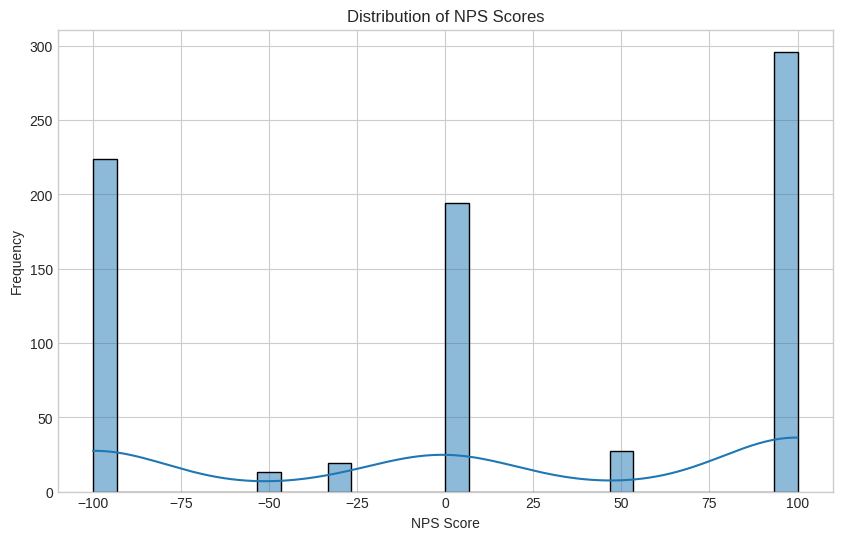

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['nps_score'], bins=30, kde=True)
plt.title('Distribution of NPS Scores')
plt.xlabel('NPS Score')
plt.ylabel('Frequency')
plt.show()

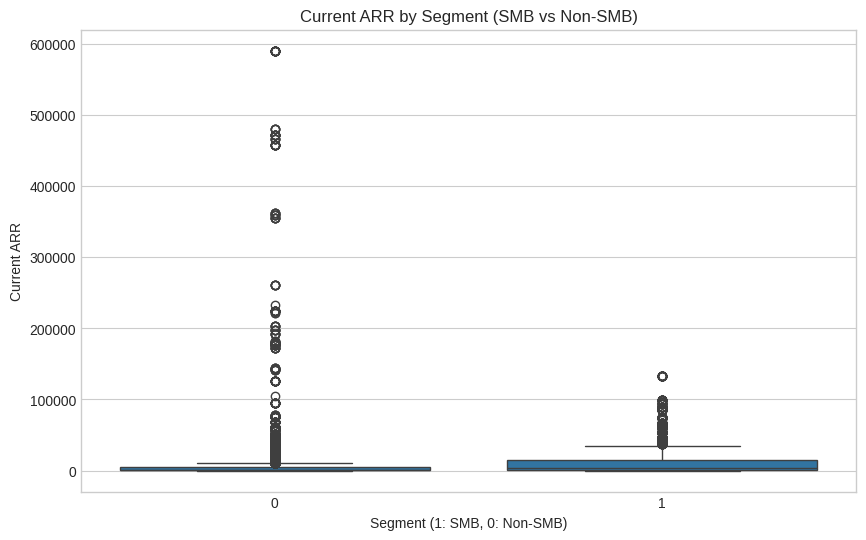

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='segment_smb', y='current_arr', data=df)
plt.title('Current ARR by Segment (SMB vs Non-SMB)')
plt.xlabel('Segment (1: SMB, 0: Non-SMB)')
plt.ylabel('Current ARR')
plt.show()

In [23]:
data['score_date'].value_counts()

score_date
2023-01-13    1045
2023-01-20    1044
2023-01-06    1044
2023-01-27    1041
2023-02-03    1039
2023-02-10    1037
2023-02-17    1034
2023-02-24    1031
2023-03-03    1028
2023-03-10    1025
2023-03-17    1021
2023-03-24    1017
2023-03-31    1011
Name: count, dtype: int64

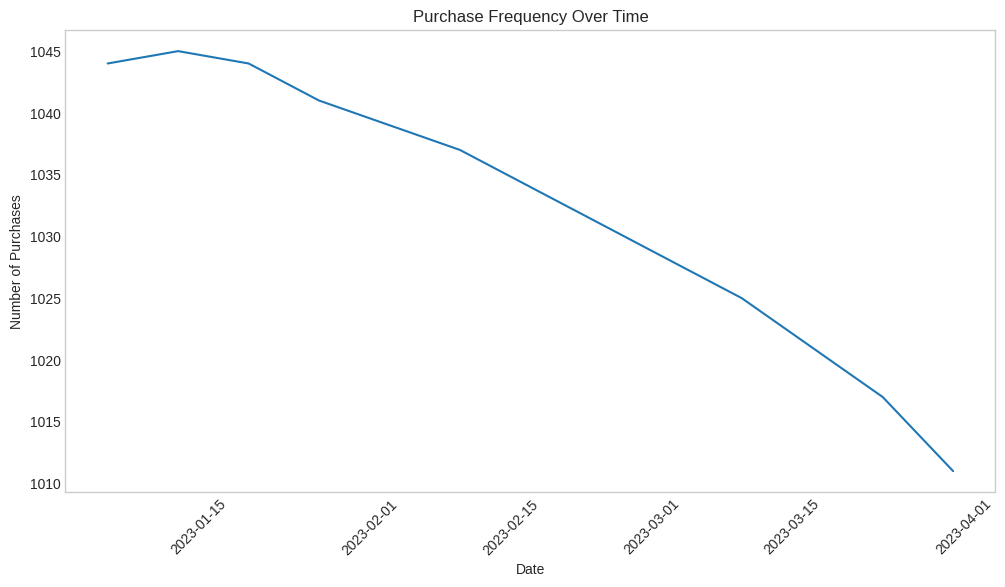

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of purchases per date
purchase_counts = df['score_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=purchase_counts.index, y=purchase_counts.values)
plt.title('Purchase Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
d = 

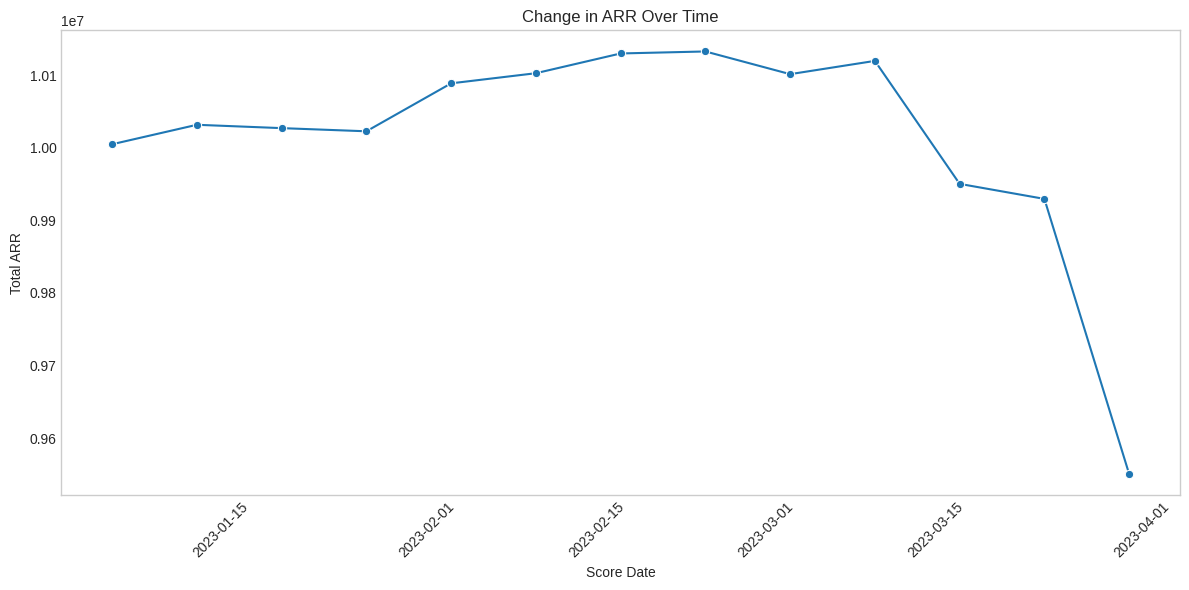

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = data

# Convert score_date to datetime
df['score_date'] = pd.to_datetime(df['score_date'], format='%d-%m-%Y')

# Group by score_date and calculate the total ARR (or average if preferred)
# Assuming 'current_arr' is the column representing ARR
arr_over_time = df.groupby('score_date')['current_arr'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=arr_over_time, x='score_date', y='current_arr', marker='o')
plt.title('Change in ARR Over Time')
plt.xlabel('Score Date')
plt.ylabel('Total ARR')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()